<a href="https://colab.research.google.com/github/schwarzg/gdg_sigongmo/blob/schwarzg/schwarzg/titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle Titanic Competition

https://www.kaggle.com/c/2019-1st-ml-month-with-kakr/

구글 드라이브에  *train.csv, test.csv* 를 업로드해 두셔야 정상작동합니다.

저는 데이터 정리를 위해 pandas를 사용하고 계산을 위해 numpy를 사용합니다.

Tensorflow와 Keras등 다른 프레임워크를 이용한 구현은 여러분께 맡기겠습니다.

**화이팅**

필요한 패키지를 준비합시다.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


우선 트레이닝을 위한 파일을 읽습니다.

데이터는 csv(comma seperated value)형식으로 저장되어 있습니다.

pandas는 아주 깔끔하게 데이터를 읽어줍니다.

Titanic Competition의 데이터파일은 12종류의 데이터를 제공합니다.

케글 코리아의 설명에 의하면 각 데이터열은 다음 정보를 알려준다고 합니다.

    survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
    pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
    sex - 성별
    Age - 나이(세)
    sibsp - 함께 탑승한 형제자매, 배우자 수 총합
    parch - 함께 탑승한 부모, 자녀 수 총합
    ticket - 티켓 넘버
    fare - 탑승 요금
    cabin - 객실 넘버
    embarked - 탑승 항구

In [37]:
#Process input data and answer
df_tr=pd.read_csv("/content/gdrive/My Drive/train.csv")

print df_tr.head()
print df_tr.isnull().any()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa



이 중 직접적으로 관련이 있을 것 같은 데이터들 추출하겠습니다.

전 Pclass, Sex, Age, SibSp , Parch, Fare, Embarked 7개의 데이터를 이용하겠습니다.

위 셀의 출력 결과를 보시면 데이터 중간중간에 NaN 값이 들어가 있는 것을 확인할 수 있습니다.

Age, Embarked, Cargbin 데이터가 빈 곳이 있다는 말이죠. 우선은 이 부분을 무시하도록 dropna 함수를 이용해 제거하고 넘어가겠습니다.

Sex와 Embarked 데이터는 문자형식으로 되어있어 네트워크에 바로 넣어주기 곤란한 형태입니다. 적당한 숫자로 바꿔줍니다.

In [39]:
df_trs=df_tr[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
df_trs=df_trs.dropna(how="any")
df_trs=df_trs.replace({"male":0,"female":1,"Q":0,"S":1,"C":2})
print df_trs.head()

X_t=df_trs[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].as_matrix()
Y_t=df_trs[["Survived"]].as_matrix()
ninp=len(X_t[0])
ndat=len(Y_t)

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         1
1         1       1    1  38.0      1      0  71.2833         2
2         1       3    1  26.0      0      0   7.9250         1
3         1       1    1  35.0      1      0  53.1000         1
4         0       3    0  35.0      0      0   8.0500         1


필요한 학습 데이터가 준비되었고, 적당한 모델을 세울 차례입니다.

전 노드 4개짜리 1개의 은닉층을 정의하고, 출력층은 1개의 노드로 만들었습니다. Weight matrix는 2개가 필요하지요.

은닉층의 활성함수는 시그모이드 함수로 사용하고 결과를 보겠습니다.

오차함수로는 교차 엔트로피를 정의하겠습니다.

In [0]:
#Weight matrix
W1=np.random.normal(size=(ninp+1,ninp/2)) #W1[0] is for bias
W2=np.random.normal(size=(ninp/2+1,1)) #W2[0] is for bias

#activation aucntion
def sig(z):
	return 1.0/(1.0+np.exp(-z))
	
def sigd(z):
	sigarr=sig(z)
	return np.multiply(sigarr,(1.0-sigarr))

#feedfoward function 
def feedfoward(X,W,B):
	return np.dot(X,W)+B

def cost(Y,Yh):
	delt=-np.multiply(Yh,np.log(Y+1e-8))-np.multiply(1.0-Yh,np.log(1.0-Y+1e-8))
	return np.mean(delt)

def get_gradient(delta,deriv,X):
	D=np.multiply(delta,deriv)
	G=np.dot(X.transpose(),D)
	return G/float(len(delta))



학습을 시작합시다!

학습률은 0.01로 두고, 데이터를 100000번 학습시켜 결과를 보겠습니다.

Epoch, Cost, Acc
0 0.6658887318837053 0.6161616161616161
10000 0.5376218999491768 0.7373737373737373
20000 0.45217270232482254 0.7957351290684624
30000 0.4475195140477129 0.792368125701459
40000 0.4324604631804837 0.8092031425364759
50000 0.4217866343702752 0.8092031425364759
60000 0.4178353925669154 0.8181818181818182
70000 0.4136801907195262 0.8204264870931538
80000 0.40749700783851733 0.8316498316498316
90000 0.40450407362239427 0.8316498316498316
100000 0.4032141252016358 0.8316498316498316


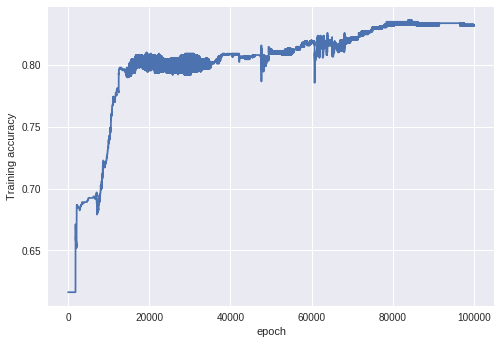

In [29]:
#hyper parameters
lr=0.01	#learningrate
epoch_num=100000

acc=np.array([])
cst=np.array([])
print "Epoch, Cost, Acc"
for i in range(epoch_num+1):

  #feedfoward
  Xin=np.concatenate((np.ones((ndat,1)),X_t),axis=1)
  z1=feedfoward(Xin,W1,0)
  H=sig(z1)
  Hin=np.concatenate((np.ones((ndat,1)),H),axis=1)
  z2=feedfoward(Hin,W2,0)
  Y=sig(z2)
	
  corr=np.equal(np.greater(Y,0.5),Y_t).astype(int)
  acc=np.append(acc,np.mean(corr))
  cst=np.append(cst,cost(Y,Y_t))

  if i%10000 is 0 :
    print i, cst[i], acc[i]
  if i is epoch_num :
    break
  
	#back propagation, gradient calculation
  deltao=(Y-Y_t).astype(float)/((Y+1e-8)*(1.0-Y+1e-8))
  gW2=get_gradient(deltao,sigd(z2),Hin)

  deltah=np.dot(np.multiply(deltao,sigd(z2)),W2[1:,:].transpose())
	
  gW1=get_gradient(deltah,sigd(z1),Xin)
	
  #update
  W1=W1-lr*gW1
  W2=W2-lr*gW2

plt.xlabel("epoch") 
plt.ylabel("Training accuracy")
plt.plot(np.arange(epoch_num+1),acc)
plt.show()

학습이 그럭저럭 된 것 같지만, 잘라내버린 값들이 신경쓰입니다.

이번에는 NaN값을 통계적으로 적당한 값으로 채워봅시다

저는 Kaggle-KR의 튜토리얼을 따라 채워보도록 하겠습니다.

https://kaggle-kr.tistory.com/category/Kaggle%20%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC/Titanic%20%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC

In [67]:
df_tr['Initial']= df_tr.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
print df_tr.head()

df_tr['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_tr.loc[(df_tr.Age.isnull())&(df_tr.Initial=='Mr'),'Age'] = 33
df_tr.loc[(df_tr.Age.isnull())&(df_tr.Initial=='Mrs'),'Age'] = 36
df_tr.loc[(df_tr.Age.isnull())&(df_tr.Initial=='Master'),'Age'] = 5
df_tr.loc[(df_tr.Age.isnull())&(df_tr.Initial=='Miss'),'Age'] = 22
df_tr.loc[(df_tr.Age.isnull())&(df_tr.Initial=='Other'),'Age'] = 46

df_tr['Embarked'].fillna('S', inplace=True)

df_trs=df_tr[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
df_trs=df_trs.replace({"male":0,"female":1,"Q":0,"S":1,"C":2})
print df_trs.head()
print df_trs.isnull().any()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Initial  
0      0         A/5 21171   7.2500   NaN        S      Mr  
1      0          PC 17599  71.2833   C85        C     Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S    Miss  
3      0            113803  53.1000  C123        S     Mrs  
4      0       

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


더 이상 데이터에 NaN값이 없는 것을 확인했으니, 다시 학습을 시작해봅시다.

Epoch, Cost, Acc
0 0.9051848593782924 0.3838383838383838
10000 0.48091326708737203 0.7878787878787878
20000 0.4472240679340607 0.8080808080808081
30000 0.4369178441764605 0.8092031425364759
40000 0.42914692863959875 0.8125701459034792
50000 0.4284647107457653 0.8125701459034792
60000 0.4280275079297465 0.813692480359147
70000 0.4277357366712092 0.813692480359147
80000 0.4276527339391587 0.813692480359147
90000 0.42677773306684785 0.8148148148148148
100000 0.42749810786033043 0.813692480359147


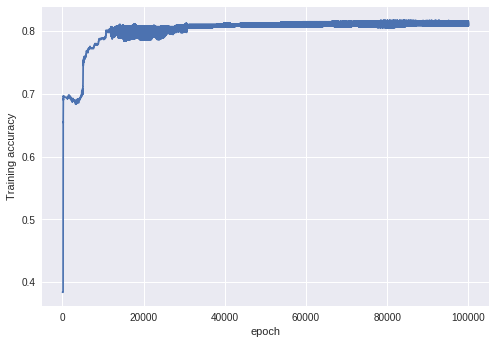

In [73]:

X_t=df_trs[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].as_matrix()
Y_t=df_trs[["Survived"]].as_matrix()
ninp=len(X_t[0])
ndat=len(Y_t)

#Weight matrix
W1=np.random.normal(size=(ninp+1,ninp/2)) #W1[0] is for bias
W2=np.random.normal(size=(ninp/2+1,1)) #W2[0] is for bias

#hyper parameters
lr=0.01	#learningrate
epoch_num=100000

acc=np.array([])
cst=np.array([])
print "Epoch, Cost, Acc"
for i in range(epoch_num+1):

  #feedfoward
  Xin=np.concatenate((np.ones((ndat,1)),X_t),axis=1)
  z1=feedfoward(Xin,W1,0)
  H=sig(z1)
  Hin=np.concatenate((np.ones((ndat,1)),H),axis=1)
  z2=feedfoward(Hin,W2,0)
  Y=sig(z2)
	
  corr=np.equal(np.greater(Y,0.5),Y_t).astype(int)
  acc=np.append(acc,np.mean(corr))
  cst=np.append(cst,cost(Y,Y_t))

  if i%10000 is 0 :
    print i, cst[i], acc[i]
    #print Y
  if i is epoch_num :
    break
  
	#back propagation, gradient calculation
  deltao=(Y-Y_t).astype(float)/((Y+1e-8)*(1.0-Y+1e-8))
  gW2=get_gradient(deltao,sigd(z2),Hin)

  deltah=np.dot(np.multiply(deltao,sigd(z2)),W2[1:,:].transpose())
	
  gW1=get_gradient(deltah,sigd(z1),Xin)
	
  #update
  W1=W1-lr*gW1
  W2=W2-lr*gW2

plt.xlabel("epoch") 
plt.ylabel("Training accuracy")
plt.plot(np.arange(epoch_num+1),acc)
plt.show()

학습이 적당히 된 것 같네요. 그럼 이 분류기로 Competition에 제출할 파일을 만들어 보겠습니다.

우선 테스트 데이터가 멀쩡한지 확인해봅시다.



In [85]:
df_te=pd.read_csv("/content/gdrive/My Drive/test.csv")
print df_te.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


맙소사. 테스트 데이터엔 무려 Fare 정보가 누락된 부분이 있군요.

편의를 위해 누락된 부분은 운임의 평균값으로 채우겠습니다.

이와 더불어 똑같이 누락된 나이 정보도 채우겠습니다.

In [86]:
df_te['Initial']= df_te.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

df_te['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_te.loc[(df_te.Age.isnull())&(df_te.Initial=='Mr'),'Age'] = 33
df_te.loc[(df_te.Age.isnull())&(df_te.Initial=='Mrs'),'Age'] = 36
df_te.loc[(df_te.Age.isnull())&(df_te.Initial=='Master'),'Age'] = 5
df_te.loc[(df_te.Age.isnull())&(df_te.Initial=='Miss'),'Age'] = 22
df_te.loc[(df_te.Age.isnull())&(df_te.Initial=='Other'),'Age'] = 46

avF=df_te['Fare'].mean()
df_te['Fare'].fillna(np.float32(avF), inplace=True)
print df_te.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Initial        False
dtype: bool


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


준비가 되었으니, 이제 테스트를 시작합니다.

In [87]:

df_te=df_te[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
print df_te.head()
print df_te.isnull().any()
df_te=df_te.replace({"male":0,"female":1,"Q":0,"S":1,"C":2})
id=df_te[["PassengerId"]].as_matrix()
X_v=df_te[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].as_matrix()

#feedfoward
ndat=len(X_v)
Xin=np.concatenate((np.ones((ndat,1)),X_v),axis=1)
z1=feedfoward(Xin,W1,0)
H=sig(z1)
Hin=np.concatenate((np.ones((ndat,1)),H),axis=1)
z2=feedfoward(Hin,W2,0)
Y_v=sig(z2)

A=np.greater(Y_v,0.5).astype(int)
sub=np.concatenate((id,A),axis=1)
sub=pd.DataFrame(sub,columns=['PassengerId','Survived'])
print sub.head()

sub.to_csv('/content/gdrive/My Drive/submission.csv',index=False)

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S
PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


과연 제 점수는 몇 점 일까요?

